In [262]:
# 

In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#Reference:
#https://www.kaggle.com/code/kerneler/starter-car-insurance-claim-data-62f4f91c-d/notebook
#https://towardsdatascience.com/15-data-exploration-techniques-to-go-from-data-to-insights-93f66e6805df
#https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d


## Dokładny opis danych
##http://rstudio-pubs-static.s3.amazonaws.com/325100_1db19d9fa2e8482c98af89a1d5d91802.html

In [291]:
df = pd.read_csv("car_insurance_claim.csv")

##  Opis zmiennych

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

### Zawartość ramki danych
'ID', - identfyfikator </br>
'KIDSDRIV' - (0,1,2,3,4) </br>
'BIRTH' - data urodzenia, DZIEN-MIESIAC-ROK'</br>
'AGE' - wiek (16 - 81)</br>
'HOMEKIDS' - ile klient ma dzieci (0-5) </br>
'YOJ' - Year of J?  </br>
'INCOME' - dochód</br>
'PARENT1' -  (No, Yes)</br>
'HOME_VAL' - ? </br>
'MSTATUS' - (yes/no) </br>
'GENDER' - płeć, przykład 'M', 'z_F </br>
'EDUCATION' - wykształcenie - 'PhD', 'z_High School', 'Bachelors', 'High School', 'Masters'</br>
'OCCUPATION' - zawód - przykładowo -'Manager', 'Doctor' </br>
'TRAVTIME' -  czas podrózy?w minutach?(14 -101)</br>
'CAR_USE' - charakter użytkowania pojazdu - prywatny / komercyjny </br>
'BLUEBOOK' - wartość pojazdu/ w USA używają tzw BlueBook</br>
'TIF' - (2,25)</br>
'CAR_TYPE' - typ ['Minivan', 'Van', 'z_SUV', 'Sports Car', 'Panel Truck', 'Pickup']</br>
'RED_CAR' - </br>
'OLDCLAIM' - koszt przeszłych roszczeń</br>
'CLM_FREQ' - częstość roszczeń </br>
'REVOKED' - odwolanie (TAK, NIE) </br>
'MVR_PTS' - (0, 13)</br>
'CLM_AMT' - liczba roszczeń (0,1,2,3,4,5)</br>
'CAR_AGE' - wiek samochodu</br>
'CLAIM_FLAG' - wystąpienie roszczenia - (0, 1)</br>
'URBANICITY' - miejsce wypadku ? ('Highly Urban/ Urban', 'z_Highly Rural/ Rural') </br>

In [293]:
report = pd.DataFrame(df.describe()).round(2)
report

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.00,10295.00,10302.00,9754.00,10302.00,10302.00,10302.00,10302.00,9663.00,10302.00
mean,4.956631e+08,0.17,44.84,0.72,10.47,33.42,5.33,0.80,1.71,8.30,0.27
std,2.864675e+08,0.51,8.61,1.12,4.11,15.87,4.11,1.15,2.16,5.71,0.44
min,6.317500e+04,0.00,16.00,0.00,0.00,5.00,1.00,0.00,0.00,-3.00,0.00
25%,2.442869e+08,0.00,39.00,0.00,9.00,22.00,1.00,0.00,0.00,1.00,0.00
50%,4.970043e+08,0.00,45.00,0.00,11.00,33.00,4.00,0.00,1.00,8.00,0.00
75%,7.394551e+08,0.00,51.00,1.00,13.00,44.00,7.00,2.00,3.00,12.00,1.00
max,9.999264e+08,4.00,81.00,5.00,23.00,142.00,25.00,5.00,13.00,28.00,1.00


### Scenariusz eksploracji danych zawarte w analizie

1. Weryfikacja unikalnych wartości
2. Eliminacja błędów danych
3. Rozkłady zmiennych
4. Liczebności/Czestość zdarzeń
5. Analiza pareto
6. Zależności pomiędzy zmiennymi

### 1. Unikalne wartośći

In [294]:
#df['HOME_VAL'].unique()
for i in df.columns:
    print(i, df[i].dtype)
    print(df.loc[:,i].unique())


ID int64
[ 63581743 132761049 921317019 ...  67790126 849208064 680381960]
KIDSDRIV int64
[0 1 2 3 4]
BIRTH object
['16MAR39' '21JAN56' '18NOV51' ... '13AUG54' '18JUN51' '27FEB47']
AGE float64
[60. 43. 48. 35. 51. 50. 34. 54. 40. 44. 37. 53. 55. 45. 39. 59. 42. 31.
 28. 47. 46. 33. 32. 49. 36. 52. 41. 56. 38. 63. 62. 30. 29. 58. 64. 66.
 26. 61. 80. 57. nan 25. 27. 20. 21. 19. 72. 69. 24. 67. 22. 23. 65. 70.
 17. 16. 81. 73. 71. 68. 18. 76.]
HOMEKIDS int64
[0 1 2 3 4 5]
YOJ float64
[11. 10. 14. nan 12.  7.  5.  0. 13.  9. 17.  8. 15. 16.  6. 18. 23.  4.
  3.  2. 19.  1.]
INCOME object
['$67,349' '$91,449' '$52,881' ... '$164,669' '$107,204' '$53,235']
PARENT1 object
['No' 'Yes']
HOME_VAL object
['$0' '$257,252' '$124,191' ... '$332,591' '$170,611' '$197,017']
MSTATUS object
['z_No' 'Yes']
GENDER object
['M' 'z_F']
EDUCATION object
['PhD' 'z_High School' 'Bachelors' '<High School' 'Masters']
OCCUPATION object
['Professional' 'z_Blue Collar' 'Manager' 'Clerical' 'Doctor' 'Lawyer' nan
 'H

### 2. Błędy danych

2.1. Znak $ w zmiennych ilosciowych

In [295]:
# w zmiennych z $ podmieniam znak na pusty i zamieniam na float
for i in df.columns:
    n = 0
    for j in list(df[i].values):
        if '$' in str(j):
            n += 1
            print(i)
            if n >= 1:
                df[i] = df[i].str.replace('$', '')
                df[i] = df[i].str.replace(',', '.').astype(np.float32)
                break

INCOME
HOME_VAL
BLUEBOOK
OLDCLAIM
CLM_AMT


2.2. Wystepowanie brakujących wartości zidentyfikowanych jako NA

In [296]:
df.isna().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [358]:
## Czyli musimy pomysleć jaka metoda zrobi imputacje danych.
df = df.replace(np.nan, -999)

for col in df.columns:
    df[col] = df[col].fillna(-999)
    
df = df[df != -999]  

df = df[df['CAR_AGE'] != 0]

In [359]:
df['CAR_AGE'].unique()

array([ 18.,   1.,  10.,   6.,  17.,   7.,  11.,   9.,   4.,   5.,  13.,
        16.,  20.,  14.,  12.,  15., -99.,   8.,   3.,  21.,  19.,  23.,
        22.,   2.,  26.,  27.,  24.,  25.,  -3.,  28.])

In [360]:
report = pd.DataFrame(df.describe()).round(2)
report

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,AGE_GROUP
count,1.029800e+04,10298.00,10298.00,10298.00,10298.00,10298.00,10298.00,10298.00,10298.00,10298.00,...,10298.00,10298.00,10298.00,10298.00,10298.00,10298.00,10298.00,10298.00,10298.0,10298.00
mean,4.955875e+08,0.17,44.74,0.72,4.65,54.89,0.13,140.37,0.60,0.46,...,0.29,13.67,0.80,0.12,1.71,9.79,1.64,0.27,0.8,3.33
std,2.864659e+08,0.51,9.38,1.12,24.90,67.80,0.34,138.39,0.49,0.50,...,0.45,87.79,1.15,0.33,2.16,78.87,26.47,0.44,0.4,0.91
min,6.317500e+04,0.00,-99.00,0.00,-99.00,-99.00,0.00,-99.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-99.00,0.00,0.0,0.00
25%,2.440942e+08,0.00,39.00,0.00,8.00,23.20,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.0,3.00
50%,4.969493e+08,0.00,45.00,0.00,11.00,51.11,0.00,151.33,1.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,8.00,0.00,1.0,3.00
75%,7.392301e+08,0.00,51.00,1.00,13.00,84.04,0.00,233.09,1.00,1.00,...,1.00,4.94,2.00,0.00,3.00,1.50,12.00,1.00,1.0,4.00
max,9.999264e+08,4.00,81.00,5.00,23.00,997.00,1.00,885.28,1.00,1.00,...,1.00,999.00,5.00,1.00,13.00,991.00,28.00,1.00,1.0,7.00


### 3 . Rozkłady zmiennych ilościowych

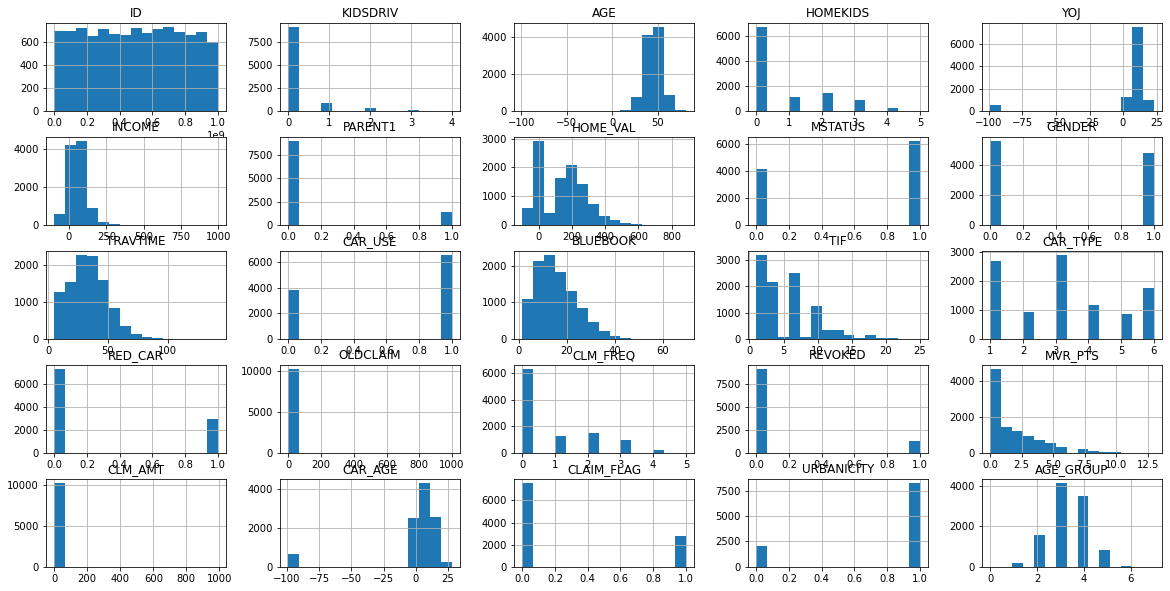

In [361]:
df[list(report.columns)].hist(bins=15, figsize=(20, 10), layout=(5, 5));

### 4. Analiza częstości występowania

In [362]:
df['AGE_GROUP'] = 0
df['AGE_GROUP'][(df['AGE'] > 15) & (df['AGE'] <= 26)] = 1
df['AGE_GROUP'][(df['AGE'] > 26) & (df['AGE'] <= 36)] = 2
df['AGE_GROUP'][(df['AGE'] > 36) & (df['AGE'] <= 46)] = 3
df['AGE_GROUP'][(df['AGE'] > 46) & (df['AGE'] <= 56)] = 4
df['AGE_GROUP'][(df['AGE'] > 56) & (df['AGE'] <= 66)] = 5
df['AGE_GROUP'][(df['AGE'] > 66) & (df['AGE'] <= 76)] = 6
df['AGE_GROUP'][(df['AGE'] > 76)] = 7

###  DO ogarniecia czemu musze tak zrobic zeby sie wyswietlalo na plocie 
#df['AGE_GROUP'] = df['AGE_GROUP']-2
#df = df[df['AGE_GROUP'] != 0]

In [363]:
_df = df.copy()
_df_1 = df.copy()

In [364]:
#### braki w wieku - zerowa
#df[df['AGE_GROUP'] == 0]

In [365]:
## liczebność grup
_df_1['AGE_GROUP_COUNT'] = df.groupby(['AGE_GROUP'])['CLAIM_FLAG'].transform('count')

In [366]:
## średnia szkoda
_df = df[df['CLAIM_FLAG'] == 1]
_df['CLM_AMT_MEAN'] = _df.groupby(['AGE_GROUP'])['CLM_AMT'].transform('mean')

In [367]:
## udział CLAIM_FLAG=1 w grupie 
_df['CLM_FLG_PRCNT'] = (df.groupby(['AGE_GROUP'])['CLAIM_FLAG'].transform('sum') / df.groupby(['AGE_GROUP'])['CLAIM_FLAG'].transform('count'))*100

_df['AGE_GROUP'].unique()

array([2, 3, 4, 5, 1, 0, 6])

In [368]:
'''
# ilościowe zmienne bez ID
for col in ['AGE_GROUP']:
    ### drugi plot

    fig=plt.figure(figsize = (10, 5))
    ax1 = fig.add_subplot(111)
    ax2 = plt.twinx()
    g=sns.barplot(x = 'AGE_GROUP',y ='AGE_GROUP_COUNT',data=_df_1,color = 'sandybrown',ax = ax1)
    
    ### O CO CHODZI
    g.set_xticklabels(['16-26','27-36','37-46',
                       '47-56','57-66','66-76'])
    
    sns.lineplot( data = _df,x = col, y = "CLM_FLG_PRCNT",ax = ax2,color = 'red')
    plt.show()
    
    
    ### drugi plot
    fig = plt.figure(figsize = (10, 5))
    ax1 = fig.add_subplot(111)
    ax2 = plt.twinx()
    g = sns.barplot(x = 'AGE_GROUP',y = _df_1['AGE_GROUP_COUNT'],data=_df_1,color = 'sandybrown',ax = ax1)
    g.set_xticklabels(['16-26','27-36','37-46',
                       '47-56','57-66','66-76'
                       ])
    
    sns.lineplot( data = _df,x = col, y = "CLM_AMT_MEAN",ax = ax2,color = 'red')
    plt.show()
    
    ### drugi plot
    fig = plt.figure(figsize = (10, 5))
    ax1 = fig.add_subplot(111)
    ax2 = plt.twinx()
    g = sns.barplot(x = 'AGE_GROUP',y = 'CLM_AMT_MEAN',data=_df,color = 'sandybrown',ax = ax1)
    g.set_xticklabels(['16-26','27-36','37-46',
                       '47-56','57-66',
                       ])

    sns.lineplot( data = _df , x = 'AGE_GROUP', y = "CLM_FLG_PRCNT",ax = ax2,color = 'red')
    plt.show()
'''

'\n# ilościowe zmienne bez ID\nfor col in [\'AGE_GROUP\']:\n    ### drugi plot\n\n    fig=plt.figure(figsize = (10, 5))\n    ax1 = fig.add_subplot(111)\n    ax2 = plt.twinx()\n    g=sns.barplot(x = \'AGE_GROUP\',y =\'AGE_GROUP_COUNT\',data=_df_1,color = \'sandybrown\',ax = ax1)\n    \n    ### O CO CHODZI\n    g.set_xticklabels([\'16-26\',\'27-36\',\'37-46\',\n                       \'47-56\',\'57-66\',\'66-76\'])\n    \n    sns.lineplot( data = _df,x = col, y = "CLM_FLG_PRCNT",ax = ax2,color = \'red\')\n    plt.show()\n    \n    \n    ### drugi plot\n    fig = plt.figure(figsize = (10, 5))\n    ax1 = fig.add_subplot(111)\n    ax2 = plt.twinx()\n    g = sns.barplot(x = \'AGE_GROUP\',y = _df_1[\'AGE_GROUP_COUNT\'],data=_df_1,color = \'sandybrown\',ax = ax1)\n    g.set_xticklabels([\'16-26\',\'27-36\',\'37-46\',\n                       \'47-56\',\'57-66\',\'66-76\'\n                       ])\n    \n    sns.lineplot( data = _df,x = col, y = "CLM_AMT_MEAN",ax = ax2,color = \'red\')\n    plt

### 5. Analiza pareto spaghetti bolognese

In [369]:
df.head(5)

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,AGE_GROUP
0,63581743,0,16MAR39,60.0,0,11.0,67.348999,0,0.000000,0,...,1,4.461000,2,0,3,0.0,18.0,0,1,5
1,132761049,0,21JAN56,43.0,0,11.0,91.448997,0,257.252014,0,...,1,0.000000,0,0,0,0.0,1.0,0,1,3
2,921317019,0,18NOV51,48.0,0,11.0,52.881001,0,0.000000,0,...,1,0.000000,0,0,2,0.0,10.0,0,1,4
3,727598473,0,05MAR64,35.0,1,10.0,16.039000,0,124.191002,1,...,0,38.689999,2,0,3,0.0,10.0,0,1,2
4,450221861,0,05JUN48,51.0,0,14.0,-99.000000,0,306.251007,1,...,1,0.000000,0,0,0,0.0,6.0,0,1,4


### 6. Zależność pomiędzy zmiennymi - 

In [370]:
#sns.pairplot(df[list(report.columns)], hue = "CLAIM_FLAG")
#plt.show()

6.1 Zamiana teskstu na factory

In [371]:
df['PARENT1'][df['PARENT1'] == 'Yes'] = 1
df['PARENT1'][df['PARENT1'] == 'No'] = 0

df['MSTATUS'][df['MSTATUS'] == 'Yes'] = 1
df['MSTATUS'][df['MSTATUS'] == 'z_No'] = 0

df['RED_CAR'][df['RED_CAR'] == 'yes'] = 1 
df['RED_CAR'][df['RED_CAR'] == 'no'] = 0

df['RED_CAR'][df['RED_CAR'] == 'yes'] = 1 
df['RED_CAR'][df['RED_CAR'] == 'no'] = 0 

df['REVOKED'][df['REVOKED'] == 'Yes'] = 1 
df['REVOKED'][df['REVOKED'] == 'No'] = 0

df['GENDER'][df['GENDER'] == 'M'] = 1 
df['GENDER'][df['GENDER'] == 'z_F'] = 0 

df['CAR_USE'][df['CAR_USE'] == 'Private'] = 1 
df['CAR_USE'][df['CAR_USE'] == 'Commercial'] = 0 

df['CAR_USE'][df['CAR_USE'] == 'Private'] = 1 
df['CAR_USE'][df['CAR_USE'] == 'Commercial'] = 0 

df['URBANICITY'][df['URBANICITY'] == df['URBANICITY'].unique()[0]] = 1 
df['URBANICITY'][df['URBANICITY'] == df['URBANICITY'].unique()[1]] = 0 

n = 0
for val in df['CAR_TYPE'].unique():
    n += 1
    print(val, n)
    df['CAR_TYPE'][df['CAR_TYPE'] == val] = n


1 1
2 2
3 3
4 4
5 5
6 6


## 7. Zależności

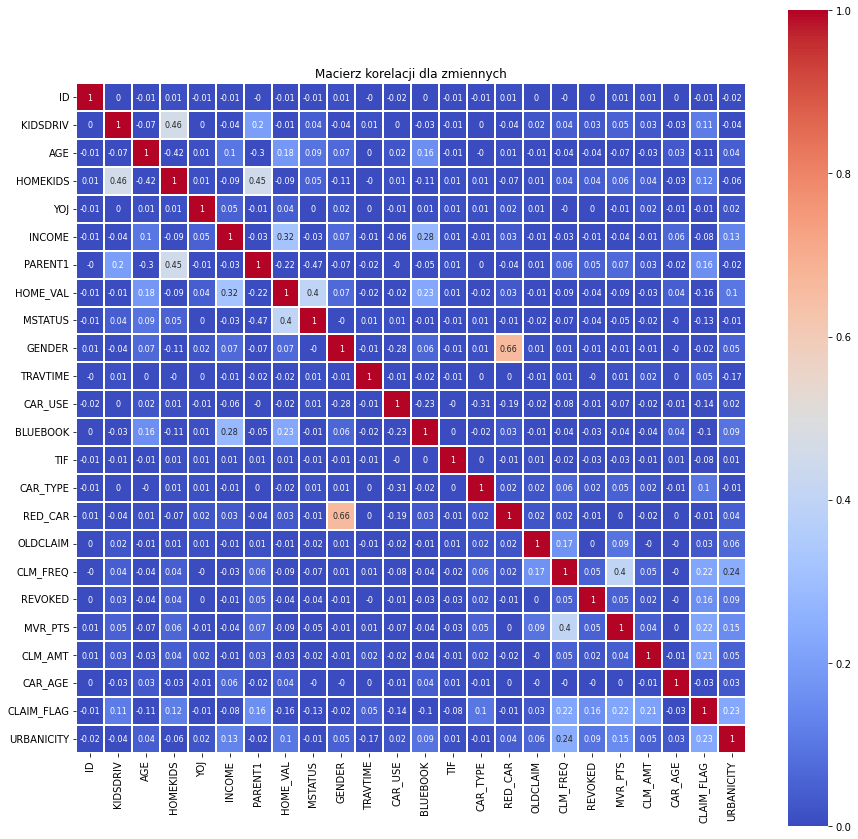

In [372]:
fig=plt.figure(figsize = (15, 15))
ax1 = fig.add_subplot(111)
corr = df.iloc[ : , : -1].corr().round(2)
sns.heatmap(corr, vmin = 0.0, vmax = 1, square=True, linewidths = 0.1, annot = True, annot_kws={"size" : 8}, cmap = "coolwarm")
plt.title("Macierz korelacji dla zmiennych")
plt.show()

## 8. Zapis danych do modelu

In [373]:
lr_df  = []

In [374]:
df.to_csv('./dane/LR_dane_treningowe_testowe.csv')

In [375]:
df.isna().sum()

ID            0
KIDSDRIV      0
BIRTH         0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
AGE_GROUP     0
dtype: int64